In [14]:
import rasterio
from rasterio.merge import merge
import glob
import os
from rasterio.plot import show     # for plotting (optional)
import matplotlib.pyplot as plt    # for plotting (optional)

import geopandas as gpd

In [ ]:
##### download links #####
# nhd watersheds...
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Hydrography/NHD/State/Shape/NHD_H_Kentucky_State_Shape.zip

# ky state boundary...
# https://prd-tnm.s3.amazonaws.com/StagedProducts/GovtUnit/Shape/GOVTUNIT_Kentucky_State_Shape.zip

# dem tiles used in project...
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n40w087_20210617.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n39w084_20220311.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n40w089_20240104.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n40w082_20230911.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n40w086_20210617.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n40w083_20230911.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n38w090_20231226.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n40w088_20221205.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n38w088_20230407.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n37w083_20220512.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n37w086_20190716.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n37w088_20230407.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n38w085_20220311.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n37w090_20231226.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n37w082_20220512.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n39w085_20230407.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n38w084_20230123.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n39w088_20221205.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n39w087_20230407.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n40w084_20200302.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n40w085_20230407.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n37w085_20171101.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n39w086_20230407.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n39w089_20221205.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n37w084_20181127.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n39w082_20230911.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n38w087_20230407.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n38w083_20230816.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n37w089_20230123.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n39w090_20221205.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n39w083_20230911.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n40w090_20230303.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n38w089_20220318.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n38w082_20230816.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n38w086_20230407.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n37w087_20230407.tif

# Merge DEM Tiles

In [ ]:
import rasterio
from rasterio.merge import merge
import glob
import os

def merge_dem_tiles(input_dir, output_path):
    
    tiles_paths = glob.glob(os.path.join(input_dir, '*.tif'))
    
    tiles_datasets = []
    
    for tile in tiles_paths:
        dem = rasterio.open(tile)
        tiles_datasets.append(dem)

    mosaic, transform = merge(tiles_datasets)

    mosaic_metadata = tiles_datasets[0].copy()

    mosaic_metadata.update({'driver':'GTiff', 
                            'height':mosaic.shape[1], 
                            'width':mosaic.shape[2], 
                            'transform':transform, 
                            'count':mosaic.shape[0]})   # number of bands (grayscale dem is 1)

    with rasterio.open(output_path, 'w', **mosaic_metadata) as output_raster:
        output_raster.write(mosaic)

    for dem in tiles_datasets:
        dem.close()

In [81]:
# directory that contains the dem geotiff tiles...
dem_tiles_dir = r'/Users/Matthew/OneDrive - University of Kentucky/CS628_Project/KY_DEM_10m_tiles'

# a list of all files in the directory that are .tif type
dem_tiles_paths = glob.glob(os.path.join(dem_tiles_dir, '*.tif'))

In [3]:
# open all tiles and store them in list...
# initialize a list to hold the individual tile datasets
dem_tiles = []

# iterate over paths for each tile
for tile in dem_tiles_paths:

    # read the tile as a rasterio.dataset
    src = rasterio.open(tile)

    # append the rasterio dataset into the list
    dem_tiles.append(src)

In [5]:
# merge the tiles and update the metadata...
# output directory and path for new mosaiced raster
output_mosaic_dir = r'C:\Users\mamass1\Desktop'
output_mosaic_path = os.path.join(output_mosaic_dir, 'test.tif')

# merge the tiles (returns the mosaiced array and its transformation metadata)
mosaic, transform = merge(dem_tiles)

# copy metadata from first tile for a template to ensure consistency 
mosaic_metadata = dem_tiles[0].meta.copy()

# update the metadata with the new mosaiced dataset information
mosaic_metadata.update({'driver': 'GTiff', 'height': mosaic.shape[1], 'width': mosaic.shape[2], 'transform': transform, 'count': mosaic.shape[0]})

# write the mosaic raster to file (** unpacks dictioary as **args)
with rasterio.open(output_mosaic_path, "w", **mosaic_metadata) as output:
    output.write(mosaic)

# close the source files
for src in dem_tiles:
    src.close()

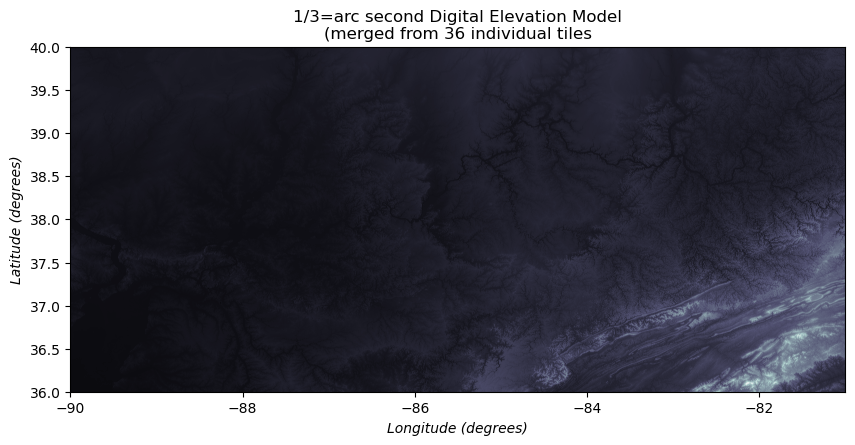

In [9]:
# plot the mosaiced raster...
# create fig and ax objects and figure size
fig, ax = plt.subplots(figsize=(10, 10))

# The 'show' function is used here for its ability to handle affine transformations
# and correctly plot the raster's spatial extent
show(mosaic, transform=transform, ax=ax, cmap='bone')

# title and labels
plt.title(f'Digital Elevation Model (1/3-arc second)\n*merged from {len(dem_tiles)} individual tiles*')
plt.xticks(np.arange(mosaic.bounds
plt.xlabel('Longitude (degrees)', style='italic')
plt.ylabel('Latitude (degrees)', style='italic')
plt.show()

# Extract Intersecting Features (Watersheds of Kentucky)

In [29]:
# path to kentucky state boundary (area polygon) shapefile
kentucky_boundary_path = r'/Users/Matthew/OneDrive - University of Kentucky/CS628_Project/KY_Boundaries/GU_StateOrTerritory.shp'

# path to huc10 watershed boundaries (area polygon) shapefile
huc10_watersheds_path = r'/Users/Matthew/OneDrive - University of Kentucky/CS628_Project/KY_NHD/WBDHU10.shp'

# read shapefiles into geodataframes
gdf_ky = gpd.read_file(kentucky_boundary_path)
gdf_huc10 = gpd.read_file(huc10_watersheds_path)

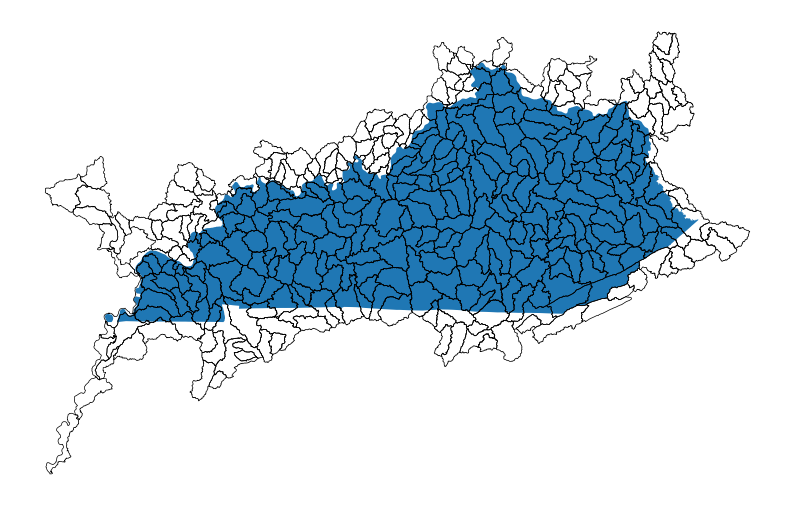

In [57]:
# plot shapefiles...
fig, ax = plt.subplots(figsize=(10,10))

# plot kentucy polyon on bottom
gdf_ky.plot(ax=ax)

# plot outlines of huc10 watersheds on top
gdf_huc10.boundary.plot(ax=ax, 
                        edgecolor='k', 
                        linewidth=0.5)

ax.axis('off')
plt.show()

In [73]:
# extract huc10 watersheds that are within or intersect kentucky using spatial join
gdf_ky_huc10 = gpd.sjoin(left_df = gdf_huc10, 
                         right_df = gdf_ky, 
                         how = 'inner', 
                         predicate = 'intersects')

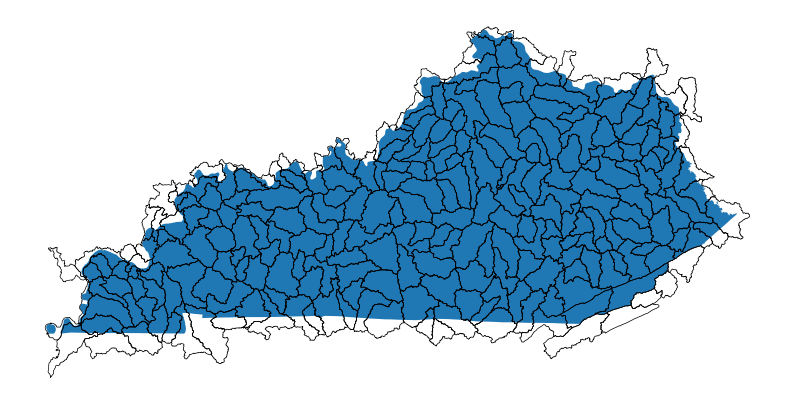

In [74]:
# plot extracted watershed boundaries to verify...
fig, ax = plt.subplots(figsize=(10,10))
gdf_ky.plot(ax=ax)
gdf_ky_huc10.boundary.plot(ax=ax, edgecolor='k', linewidth=0.5)
ax.axis('off')
plt.show()

In [75]:
# clean up unnecessary columns in new huc10 boundaries
gdf_ky_huc10.drop(columns=['tnmid', 'metasource', 'sourcedata', 'sourceorig', 'sourcefeat',
                           'areaacres','states','ObjectID_left', 'index_right','permanent_',
                           'source_fea', 'source_dat', 'source_d_1', 'source_ori','loaddate_right', 
                           'fcode', 'state_fips', 'state_name', 'population','areasqkm_right', 
                           'gnis_id', 'gnis_name', 'shape_Leng_right','shape_Area_right', 
                           'ObjectID_right', 'referenceg', 'hutype', 'humod', 'shape_Leng_left', 
                           'shape_Area_left'], inplace=True)

# rename remaining columns
gdf_ky_huc10.rename(columns={'loaddate_left':'loaddate', 'areasqkm_left':'areasqkm'}, inplace=True)

# reset index
gdf_ky_huc10.reset_index(drop=True, inplace=True)

In [72]:
# save extracted huc10 watersheds as shapefile...
# output path for new shapefile
output_shapfile_path = r'/Users/Matthew/OneDrive - University of Kentucky/CS628_Project/KY_NHD/ky_huc10.shp'

# save shapefile
gdf_ky_huc10.to_file(output_shapfile_path)

# Clip DEM to Shapefile

In [93]:
# paths to dem and shapefile to be used for clipping dem...
dem_path = r''
polygon_clip_path = r'/Users/Matthew/OneDrive - University of Kentucky/CS628_Project/KY_NHD/ky_huc10.shp'

In [96]:
from shapely.ops import unary_union

gdf_ky_huc10 = gpd.read_file(polygon_clip_path)

watershed_outline = unary_union(gdf_ky_huc10.geometry)

In [ ]:
import rasterio
from rasterio.mask import mask

# Path to your raster file
raster_path = 'path/to/your/raster.tif'

# Open the raster file
with rasterio.open(raster_path) as src:
    # Clip the raster with the merged polygon
    out_image, out_transform = mask(src, [merged_polygon], crop=True)
    
    # Copy the metadata of the source raster
    out_meta = src.meta.copy()

# Update the metadata to match the clipped raster
out_meta.update({
    "driver": "GTiff",
    "height": out_image.shape[1],
    "width": out_image.shape[2],
    "transform": out_transform
})

In [ ]:
# Define the path for the output raster
out_raster = 'path/to/your/clipped_raster.tif'

# Write the clipped raster to a new file
with rasterio.open(out_raster, "w", **out_meta) as dest:
    dest.write(out_image)
